# Section 1:Prediction of Medical Insurance Costs using Machine Learning Models

# Section 1:1: Machine Learning Techniques Required 
The best machine learning algorithm to apply to this study is the supervised machine learning algorithms. This is because the data are labelled and they are trying to predict a known label based on the given features. In the dataset for this tudy, the eight predictors namely age, sex, bmi, children, smoker status, region, and medical cost are patient data which can be likedned to historical data which can predict future events such as medical cost. Thus understanding the relationship between these variabels and thir ability to predict medical cost makes regression techniques a suitable algorithm for this study. The methodology applied in both sections of this study involved data cleaning/preprocessing; exploratory data analysis and lastly the application of a suitable machine learning model.

# Section1.2: : Data Cleaning and Preprocessing
Regression algorithms work only with numerical features. However, in the data it can be observed that the sex, smoker and region variable are in string format. Thus we conver them to numerical variables using the seem to be working on features represented as numbers only… By looking at our dataset we see that columns — ‘sex’, ‘smoker’ and ‘region’ are in string format, so we can work on converting them to numerical values as below



In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#To Load Data
data3= pd.read_csv("N:\insurance.csv")





In [19]:
#View the first five rows of the data 
data3.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
#Checking for null values
data3.isnull()

,age,sex,bmi,children,smoker,region,medicalCost
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [53]:
#To check the data types
data3.dtypes

age              int64
sex              int32
bmi            float64
children         int64
smoker           int32
region           int32
medicalCost    float64
dtype: object

In [11]:
#Checking the shape of the data
data3.shape

(1338, 7)

# Section 1.3: Exploratory Data Analysis
The data was explored and the average age of the persons in the data set was 39 years. While the gender was nearly equally split across both males and females. The average BMI was 30.66. Considering the relationships between the predictors, It could be observed that as age increases, medical costs also increase.The range of medical costs varied widely as the minimum was 1,121 USD per annum and the maximum was 63,770.43 USD per annumn. Approximately seventy-five percent of the individuals spent approximately 16,639.91USD or less on the medical costs per annumn. The dataset was split into trainning and test data, with 30% test data and 70% trainning data. Thus 936 was used to test the data and 402 was used to train the data.

In [12]:
data3.describe()

,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\s4113291\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

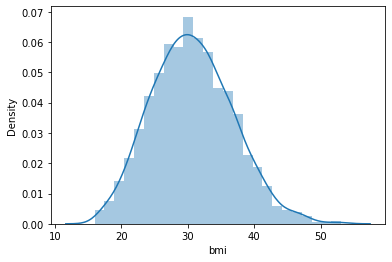

In [34]:
sns.distplot(data3["bmi"])

C:\Users\s4113291\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

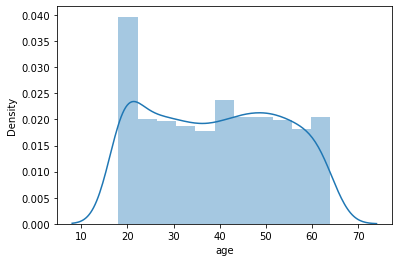

In [36]:
sns.distplot(data3["age"])

C:\Users\s4113291\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medicalCost', ylabel='Density'>

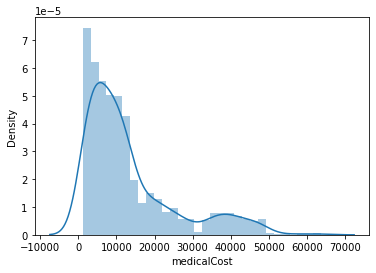

In [37]:
sns.distplot(data3["medicalCost"]) 

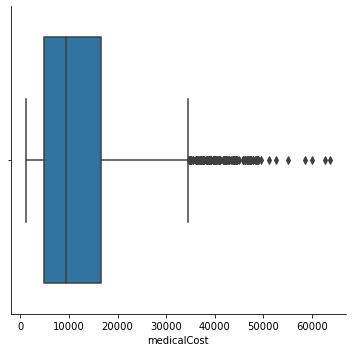

In [39]:
sns.catplot(x="medicalCost", kind="box", data=data3)

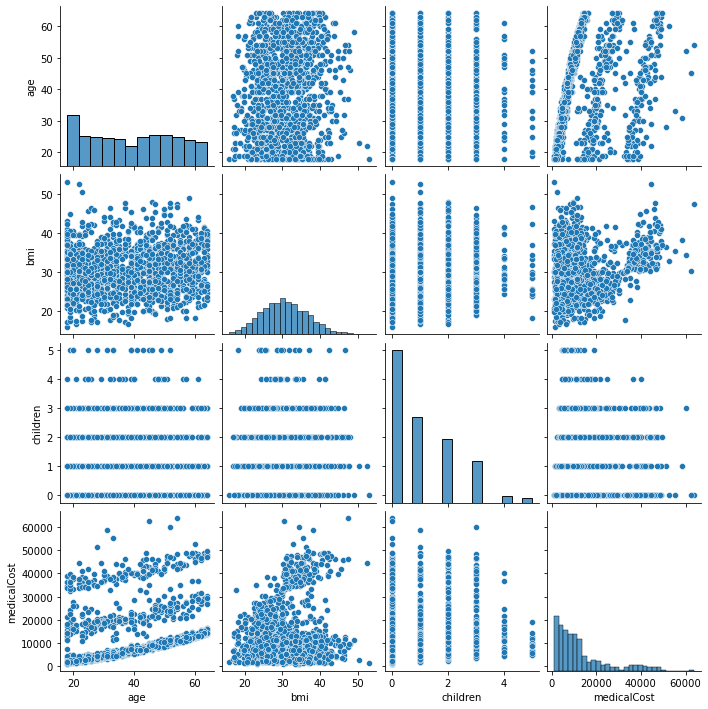

In [23]:
#Using pair plots to obseve relationship between variables
sns.pairplot(data3)

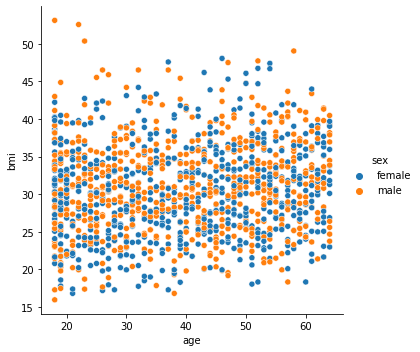

In [25]:
sns.relplot(x= "age", y="bmi", hue="sex", data=data3)

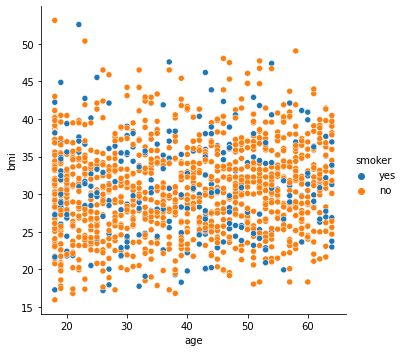

In [26]:
sns.relplot(x= "age", y="bmi", hue="smoker", data=data3)

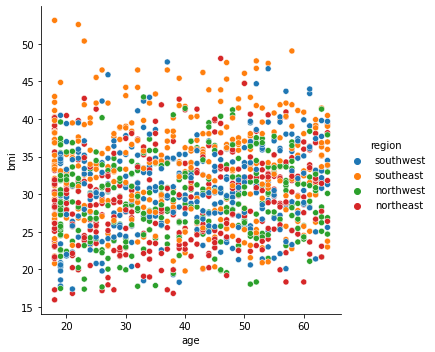

In [28]:
sns.relplot(x= "age", y="bmi", hue="region", data=data3)

C:\Users\s4113291\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='medicalCost'>

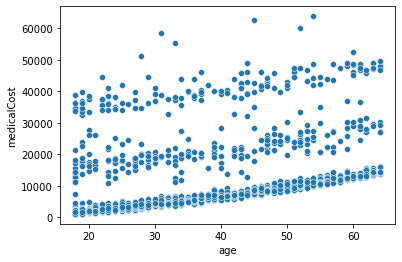

In [46]:
sns.scatterplot(data3["age"],data3["medicalCost"])

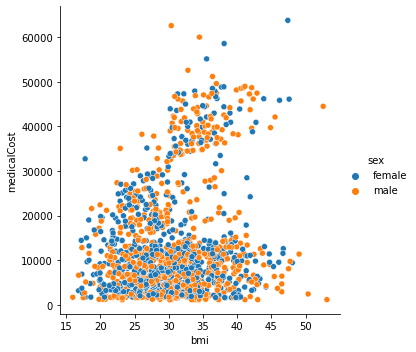

In [32]:
sns.relplot(x= "bmi", y="medicalCost", hue="sex", data=data3)

In [48]:
#Transforming Categorical Variables to numeric variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data3['sex'] = le.fit_transform(data3['sex'])
data3['smoker'] = le.fit_transform(data3['smoker'])
data3['region'] = le.fit_transform(data3['region'])

In [55]:
#Observing missing values on the count row while observing the summary of only numeric values 
data3.describe()
data3.describe(include={np.number})

,age,sex,bmi,children,smoker,region,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [49]:
#Determining the correlation
data3.corr()

,age,sex,bmi,children,smoker,region,medicalCost
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
medicalCost,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot:>

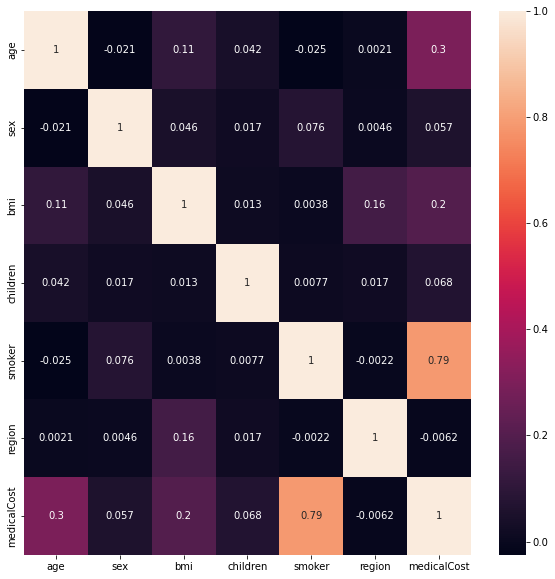

In [50]:
#Correlation of Numeric Variables
corrmat=data3.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, annot=True)

In [44]:
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Exploring the Individual relationships between the target variable (medical cost) and the independent variables
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(20,10))
sns.countplot(x="age", data=data3,hue="medicalCost",ax = ax[0][0])
cp = sns.countplot(x="sex", data=data3,hue="medicalCost",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=90, ha="left")
cp1 = sns.countplot(x="bmi", data=data3,hue="medicalCost",ax = ax[0][2])
cp1.set_xticklabels(cp1.get_xticklabels(), rotation=90, ha="left")
cp2 = sns.countplot(x="children", data=data3,hue="medicalCost", ax = ax[1][0])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=90, ha="medicalCost")
cp3 = sns.countplot(x="smoker", data=data3,hue="medicalCost",ax= ax[1][1])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=90, ha="left")
cp4 = sns.countplot(x="region", data=data3,hue="medicalCost",ax= ax[1][2])
cp4.set_xticklabels(cp.get_xticklabels(), rotation=90, ha="left")
plt.tight_layout()

In [1]:
#Importing train_test_split model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
#Model Fitting
x=data3.drop(["medicalCost"], axis=1)
y=data3["medicalCost"]

In [7]:
# splitting train and test data
xlinear_train, xlinear_test, ylinear_train, ylinear_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:
#Measuring the length of the test and trainning data sets
len(xlinear_test) 
len(xlinear_train)
len(data3) 

1338

In [ ]:
#importing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit linear model by passing training dataset
lr=model.fit(xlinear_train,ylinear_train)

# Section 2
# Prediction of  Annual Adult incomes
Introduction

This study seeks to predict the annual income of adult incomes based on a number of given attributes. The variables are found in fourteen columns. They contain Age, Workclass, fnlweight, education, marital status, occupation, relationship, sex, Capital-gain, Capital-loss, Hours-per-week, native country and income. A series of Machine Learning Algorithms were applied to the data set with the aim of determining if an Adult earned an annual income of more than $50,000 or less. The Algorithms applied were Both supervised and unsupervised. Among the supervised algorithms applied, there was logistic regression, Suppport vector machines. The unsupervised methods applied included classification algorithms such as decision trees, random forest and DBSCAN. This report begins with Exploratory Data analysis, Application of Classification Techniques, clustering Techniques and Artificial Neural Networks. Under each of these sections, optimisations were employed to ensure that the accuracies were high.

The study also sough to test two hypothesis namely

Hypothesis 1
Ho: There is no positive correlation between final weight and income levels.
Hi: There is a positive correlation between final weight and income levels.

Hypothesis 2
Ho: There is no significant relationship between level of education and income levels.
H1: There is a significant relationship between level of education and income levels.



# Importing the Libraries used in this study
A series of libraries were employed in this study as this was used for the purpose of exploratory data analysis (EDA) and visualisations. The libraries were also used to build prediction models and optimisation of results. Libraries employed in this study include Numpy, seasborn, matplotlib, Pandas, Sklearn among others.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas.plotting import scatter_matrix
from copy import deepcopy as copy 
from IPython.display import Latex
from IPython.display import Math
!pip install joblib


# Importing the Dataset
The data set used in this study was the US census Dataset from the census bureau. this is publicly available on the UCI Machine Learning repository. It was download and saved on my system. The pandas library was used to upload the data set here.

In [227]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [215]:
data_CensusDB= pd.read_csv("N:\CensusDB.csv") 


# Data Cleaning and Preprocessing
Upon using the data_CensusDB.head() function, it could be observed that there were some missing values indicated by question marks in the workclass and the occupation column. This was further investigated using the .shape function which indicated that a little ovver 5.69% of the data had rows presenting with question marks. Thus the data preocessing involved deleting all these rows as these rows as approximately 95% of the data will remain unaffected by this deletion, thus preserving the intergrity of the dataset.

In [216]:
data_CensusDB.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [217]:
col_names = data_CensusDB.columns
num_data = data_CensusDB.shape[0]
for c in col_names:
    num_non = data_CensusDB[c].isin(["?"]).sum()
    if num_non > 0:
        print(c)
        print(num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
1836
5.64%


occupation
1843
5.66%


native-country
583
1.79%




In [218]:
#Removing the rows with "?"
data=data_CensusDB.replace('?', np.nan).dropna()


In [219]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K


# Exploratory Data Analysis
The exploratory data analysis involved both univariate and bi variate visualisations.Finding show that males had a higher chance of earning more than 50,00 USD per annum compared to females. Comparing the working class and self-employed more, the working population were more likely to earn more than 50,00o USD per annum. The only educational classes that had a higher ratio of persons earning more than 50,000USD per annum compared to those who did not were persons educated up to the professorial or doctorate level. Never the less persons that were educated up to bachelors level had the highest number of individuals earning above 50,00o  USD. While the majority of population in this study were high school graduates and this constituted the second highest education level (after the bachelor’s level) to earn more than 50,000 USD per annum.

In [220]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [229]:
# Identify Numeric Varaibles
num_variables = ['age','gain','loss','h_week']

# Identify Categorical features
cat_variables = ['workclass','education','status', 'occupation', 'relationship', 'sex', 'country', 'income']


C:\Users\s4113291\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, '7th-8th'),
  Text(2, 0, 'Some-college'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-voc'),
  Text(10, 0, '1st-4th'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, 'Assoc-acdm'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

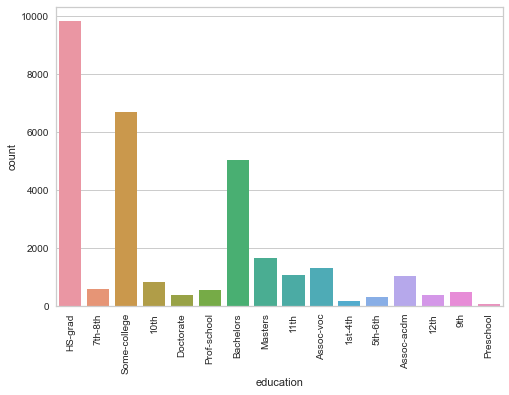

In [222]:
sns.countplot(data.education)
plt.xticks(rotation=90)

C:\Users\s4113291\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Exec-managerial'),
  Text(1, 0, 'Machine-op-inspct'),
  Text(2, 0, 'Prof-specialty'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Adm-clerical'),
  Text(5, 0, 'Transport-moving'),
  Text(6, 0, 'Sales'),
  Text(7, 0, 'Craft-repair'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Protective-serv'),
  Text(11, 0, 'Handlers-cleaners'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

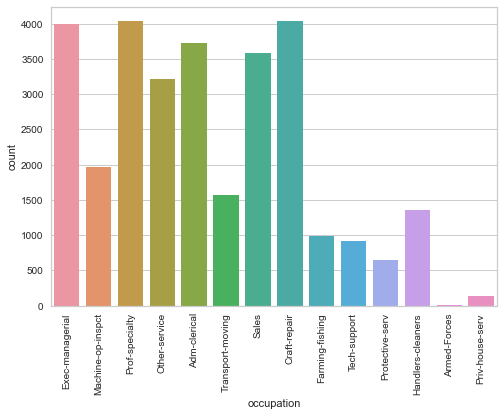

In [223]:
sns.countplot(data.occupation)
plt.xticks(rotation=90)

C:\Users\s4113291\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'State-gov'),
  Text(2, 0, 'Federal-gov'),
  Text(3, 0, 'Self-emp-not-inc'),
  Text(4, 0, 'Self-emp-inc'),
  Text(5, 0, 'Local-gov'),
  Text(6, 0, 'Without-pay')])

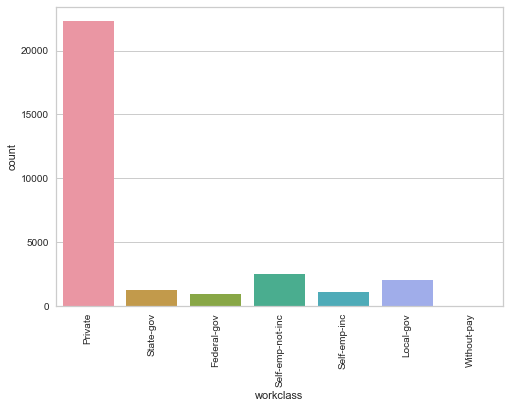

In [224]:
data.value_counts()
sns.countplot(data.workclass)
plt.xticks(rotation=90)

C:\Users\s4113291\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Unmarried'),
  Text(2, 0, 'Own-child'),
  Text(3, 0, 'Other-relative'),
  Text(4, 0, 'Husband'),
  Text(5, 0, 'Wife')])

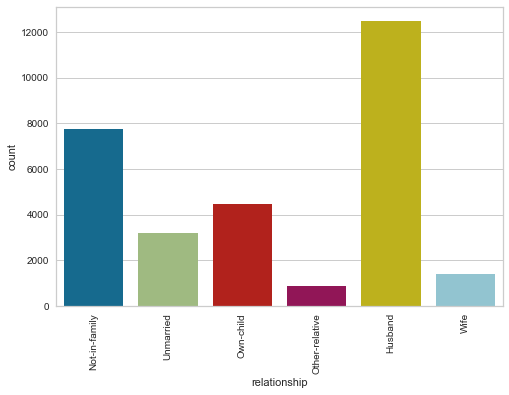

In [225]:
sns.countplot(data.relationship)
plt.xticks(rotation=90)

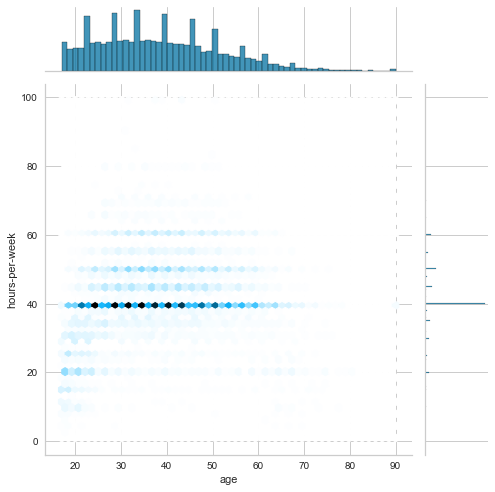

In [230]:
sns.jointplot(x ="age", y="hours-per-week", data=data,kind="hex",size = 7)
#sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
#kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex

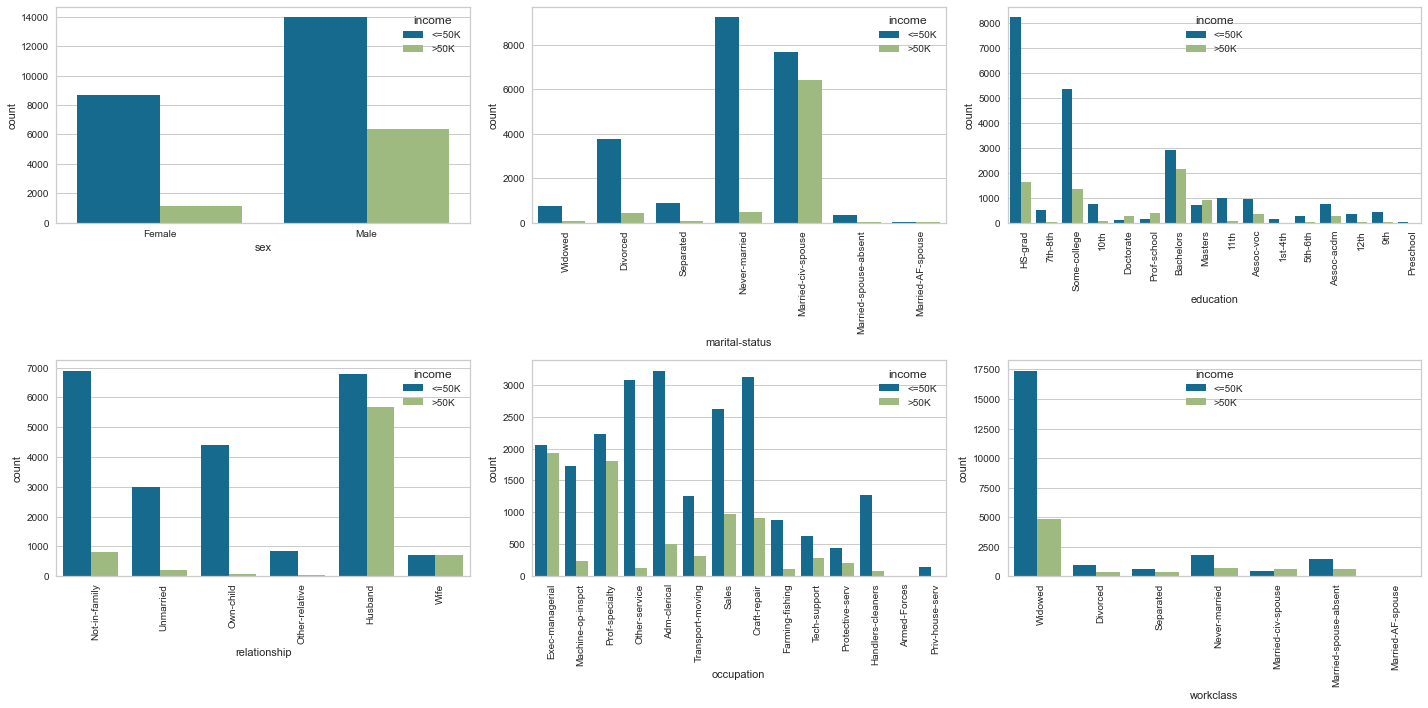

In [232]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(20,10))
sns.countplot(x="sex", data=data,hue="income",ax = ax[0][0])
cp = sns.countplot(x="marital-status", data=data,hue="income",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=90, ha="left")
cp1 = sns.countplot(x="education", data=data,hue="income",ax = ax[0][2])
cp1.set_xticklabels(cp1.get_xticklabels(), rotation=90, ha="left")
cp2 = sns.countplot(x="relationship", data=data,hue="income", ax = ax[1][0])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=90, ha="left")
cp3 = sns.countplot(x="occupation", data=data,hue="income",ax= ax[1][1])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=90, ha="left")
cp4 = sns.countplot(x="workclass", data=data,hue="income",ax= ax[1][2])
cp4.set_xticklabels(cp.get_xticklabels(), rotation=90, ha="left")
plt.tight_layout()


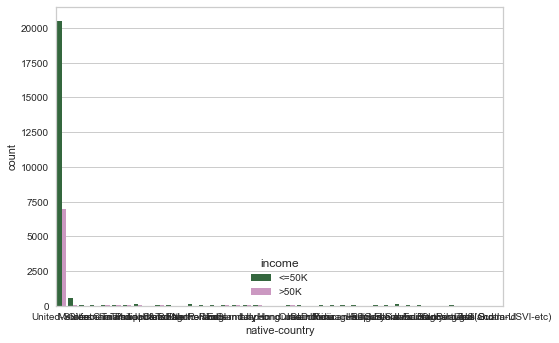

In [234]:
sns.countplot(x="native-country",hue="income", palette="cubehelix", data=data);

# Correlation Matrix and Hypothesis testing
The correlation matrix shows that income is mostly correlated with education at 34%% and hours of work per week and age at 23%. This is closely followed by capital gain which has a correlation of 22%.  The correlation matrix formed a basis fo accepting the null hypothesis ih hypothesis 1 while rejecting the alternative. However for hypothsis two, the null was accepted and the alternative rejected. Thus they were restated as follows:

Hypothsis 1
Ho: There is no positive correlation between final weight and income levels.

Hypothesis 11

H1: There is a significant relationship between level of education and income levels.

<AxesSubplot:>

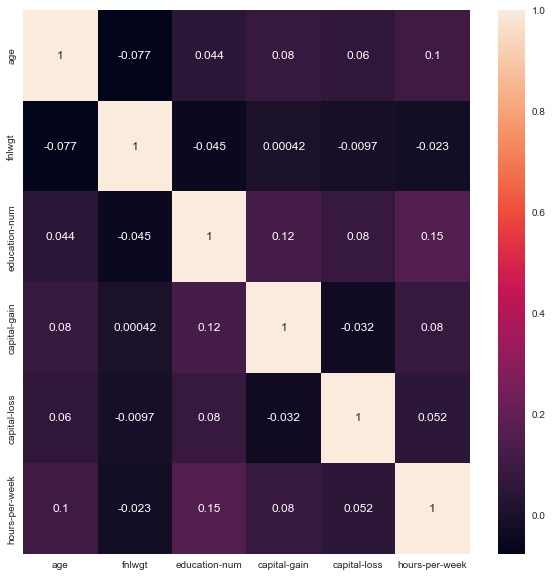

In [235]:
#Correlation of Numeric Variables
corrmat=data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, annot=True)

The fnlwgt column was dropped as further research reveals that it is a weighted average of age sex and race. Thus in terms of hierachies, the fnlwgt column may be seen not tobe on the same strata with the other non weighted averages. Thus to prevent any skewing of the data set arising from this, the fnlwgt column was dropped prior to the building of a model.

# Classification Model 1: Logistic Regression

In [250]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,82,2,132870,11,9,6,3,1,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,1,0,3770,40,38,0


In [ ]:
#Creating the predictors
x = data.drop('income', axis=1)
y = data.income

In [252]:
#Dividing the dataset into training and test

from sklearn.model_selection import train_test_split
#Dataset 1
xlr_train, xlr_test, ylr_train, ylr_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [254]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
xlr_train= sc.fit_transform(xlr_train)
xlr_test=sc.transform(xlr_test)

In [258]:
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression()


In [259]:
model_lr.fit(xlr_train, ylr_train)

ylr_predict=model_lr.predict(xlr_test)


In [260]:
print("Logistic Regression Score : ",model_lr.score(xlr_test, ylr_test))

Logistic Regression Score :  0.820321564727333


In [270]:
a=pd.DataFrame({"Actual value":ylr_test,"Predicted value":ylr_predict})


In [271]:
a.head()

,Actual value,Predicted value
2086,1,1
15618,0,0
29045,0,0
27504,0,0
9264,0,0


In [272]:
#Calculating performance measures
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4529
           1       0.73      0.45      0.55      1504

    accuracy                           0.82      6033
   macro avg       0.78      0.70      0.72      6033
weighted avg       0.81      0.82      0.80      6033



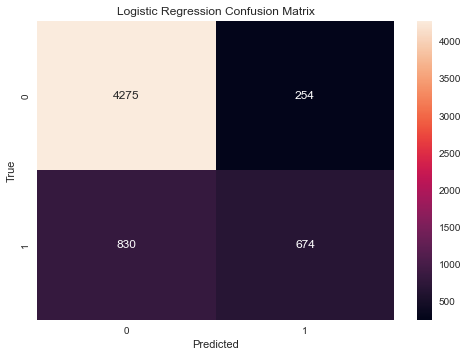

In [282]:
matrix=confusion_matrix(ylr_test,ylr_predict)
sns.heatmap(matrix, annot=True,fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")            
print(classification_report(ylr_test,ylr_predict))

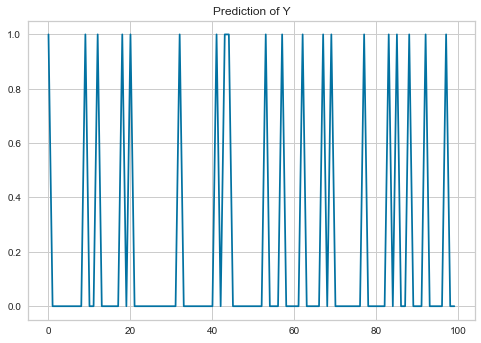

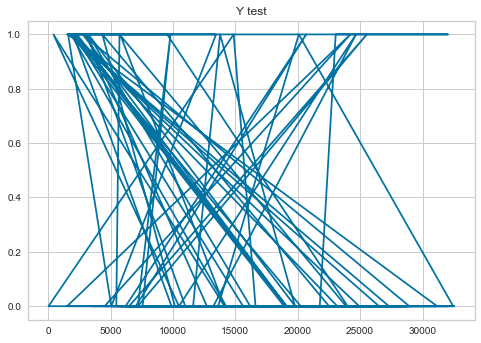

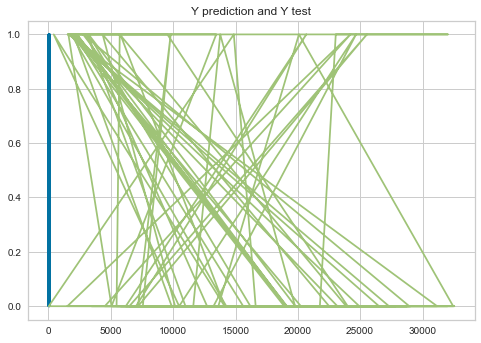

In [287]:
plt.title("Prediction of Y")
plt.plot(ylr_predict[0:100])
plt.show()
plt.title("Y test")
plt.plot(ylr_test[0:100])
plt.show()
plt.title("Y prediction and Y test")
plt.plot(ylr_predict[0:100])
plt.plot(ylr_test[0:100])
plt.show()

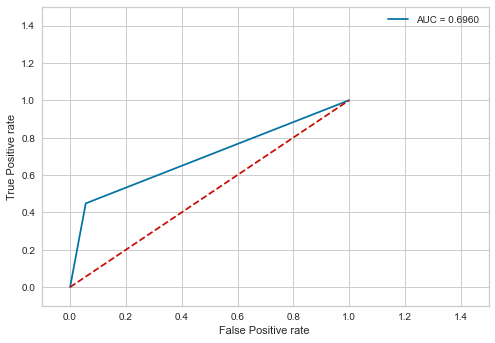

ROC_AUC_Score :  0.696027638669003


In [286]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(ylr_test, ylr_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='upper right')
plt.plot([0,1],[0,1.0],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate ')
plt.show()
print("ROC_AUC_Score : ", roc_auc_score(ylr_test, ylr_predict))

The logistic regression model gives an accuracy of  0.82. It had a higher prediction among the poluation that earn less than 50 00USD (84 %) as compared to a lesser accuracy of (73%) among those that earned more than 50,000USD. The AUC curve further suggsts that this model can predict annuali incomes to a degree of accuracy of 69%.  

# Hyperparameter tunning for logistic regression


In [288]:
param = [
    {'penalty': ['l1'], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs','sag']},
    {'C' : np.logspace(-1, 1, 3)},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag']},
    {'max_iter' : [100, 1000,2500, 5000]}
 ]

In [315]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid =  [
    {'penalty': ['l1'], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs','sag']},
    {'C' : np.logspace(-1, 1, 3)},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag']},
    {'max_iter' : [100, 1000,2500, 5000]}
 ]

# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [316]:
 #Fit the grid search to the data
grid_search.fit(xlr_train, ylr_train)
grid_search.best_params_
[
    {'penalty': ['l1'], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs','sag']},
    {'C' : np.logspace(-1, 1, 3)},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag']},
    {'max_iter' : [100, 1000,2500, 5000]}
 ]

best_grid = grid_search.best_estimator_
grid_accuracy = (best_grid, xlr_train,  ylr_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


Parameters for optimisation using Grid search
bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators':

# Classification Model 1: Decision Tree

In [329]:
#Perform Test and Train Split
#Splitting the data into test and train
from sklearn.model_selection import train_test_split
xdt_train, xdt_test, ydt_train, ydt_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [330]:
#Fitting the Decision Tree Model to the Data
#Creating Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf=tree.DecisionTreeClassifier(criterion="entropy",  max_depth=3)
#Train decision Tree Classifier
clf = clf.fit(xdt_train, ydt_train)

In [331]:
#Predict the response for the test data set
ydt_pred = clf.predict(xdt_test)

In [332]:
#Checking Accuracy of the Model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ydt_test, ydt_pred))

Accuracy: 0.8339134758826454


In [333]:
print(confusion_matrix(ydt_test, ydt_pred))

[[4315  218]
 [ 784  716]]


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

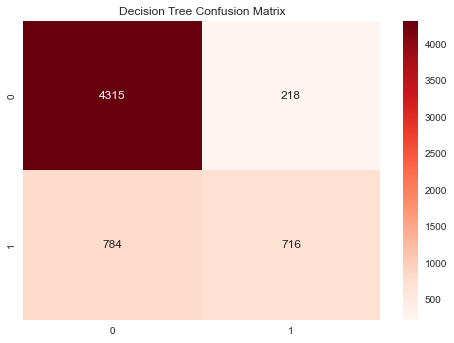

In [334]:
sns.heatmap(confusion_matrix(ydt_test, ydt_pred),cmap='Reds', annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")

[Text(0.5, 0.875, 'X[7] <= 0.5\nentropy = 0.81\nsamples = 24129\nvalue = [18121, 6008]'),
 Text(0.25, 0.625, 'X[4] <= 12.5\nentropy = 0.995\nsamples = 9921\nvalue = [5362, 4559]'),
 Text(0.125, 0.375, 'X[9] <= 5095.5\nentropy = 0.926\nsamples = 6956\nvalue = [4584, 2372]'),
 Text(0.0625, 0.125, 'entropy = 0.887\nsamples = 6588\nvalue = [4578, 2010]'),
 Text(0.1875, 0.125, 'entropy = 0.12\nsamples = 368\nvalue = [6, 362]'),
 Text(0.375, 0.375, 'X[9] <= 5095.5\nentropy = 0.83\nsamples = 2965\nvalue = [778, 2187]'),
 Text(0.3125, 0.125, 'entropy = 0.895\nsamples = 2492\nvalue = [777, 1715]'),
 Text(0.4375, 0.125, 'entropy = 0.022\nsamples = 473\nvalue = [1, 472]'),
 Text(0.75, 0.625, 'X[9] <= 7073.5\nentropy = 0.475\nsamples = 14208\nvalue = [12759, 1449]'),
 Text(0.625, 0.375, 'X[7] <= 4.5\nentropy = 0.411\nsamples = 13895\nvalue = [12750, 1145]'),
 Text(0.5625, 0.125, 'entropy = 0.294\nsamples = 12833\nvalue = [12167, 666]'),
 Text(0.6875, 0.125, 'entropy = 0.993\nsamples = 1062\nvalue 

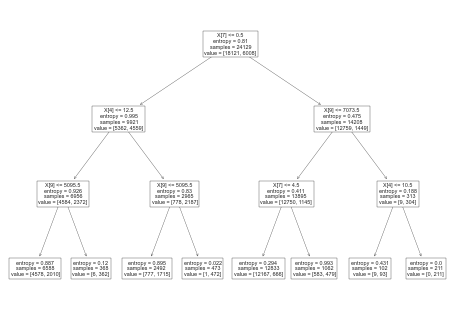

In [335]:
#Plotting the Decision Tree
tree.plot_tree(clf)

In [336]:
#Changing the Max Depth to 10
#Fitting the Decision Tree Model to the Data
#Creating Decision Tree Classifier
from sklearn import tree
clf1=tree.DecisionTreeClassifier(criterion="entropy",  max_depth=10)
#Train decision Tree Classifier
clf = clf.fit(xdt_train, ydt_train)

In [337]:
#Predict the response for the test data set
ydt1_pred = clf.predict(xdt_test)

In [344]:
#Checking Accuracy of the Model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ydt_test, ydt_pred))

Accuracy: 0.8339134758826454


Hyper Parameters
'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}


[Text(0.5, 0.875, 'X[7] <= 0.5\nentropy = 0.81\nsamples = 24129\nvalue = [18121, 6008]'),
 Text(0.25, 0.625, 'X[4] <= 12.5\nentropy = 0.995\nsamples = 9921\nvalue = [5362, 4559]'),
 Text(0.125, 0.375, 'X[9] <= 5095.5\nentropy = 0.926\nsamples = 6956\nvalue = [4584, 2372]'),
 Text(0.0625, 0.125, 'entropy = 0.887\nsamples = 6588\nvalue = [4578, 2010]'),
 Text(0.1875, 0.125, 'entropy = 0.12\nsamples = 368\nvalue = [6, 362]'),
 Text(0.375, 0.375, 'X[9] <= 5095.5\nentropy = 0.83\nsamples = 2965\nvalue = [778, 2187]'),
 Text(0.3125, 0.125, 'entropy = 0.895\nsamples = 2492\nvalue = [777, 1715]'),
 Text(0.4375, 0.125, 'entropy = 0.022\nsamples = 473\nvalue = [1, 472]'),
 Text(0.75, 0.625, 'X[9] <= 7073.5\nentropy = 0.475\nsamples = 14208\nvalue = [12759, 1449]'),
 Text(0.625, 0.375, 'X[7] <= 4.5\nentropy = 0.411\nsamples = 13895\nvalue = [12750, 1145]'),
 Text(0.5625, 0.125, 'entropy = 0.294\nsamples = 12833\nvalue = [12167, 666]'),
 Text(0.6875, 0.125, 'entropy = 0.993\nsamples = 1062\nvalue 

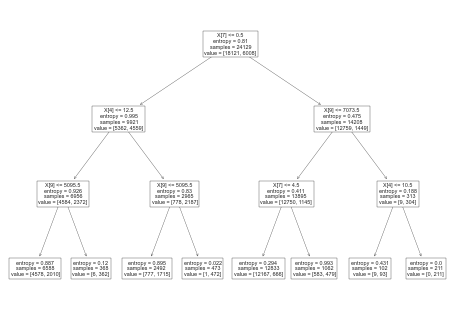

In [358]:
tree.plot_tree(clf)

In [359]:
print(confusion_matrix(ydt_test, ydt_pred))

[[4315  218]
 [ 784  716]]


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

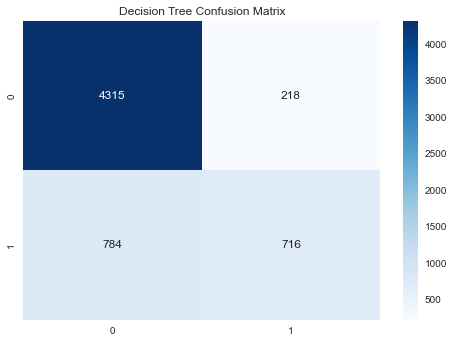

In [360]:
sns.heatmap(confusion_matrix(ydt_test, ydt_pred),cmap='Blues', annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4533
           1       0.60      0.61      0.60      1500

    accuracy                           0.80      6033
   macro avg       0.73      0.74      0.73      6033
weighted avg       0.80      0.80      0.80      6033



Text(0.5, 1.0, 'Decision Tree classification report Matrix')

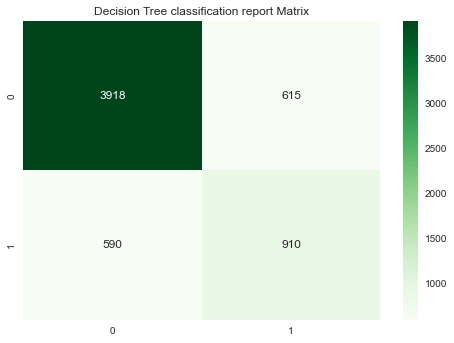

In [361]:
dt=DecisionTreeClassifier()

dt_model=dt.fit(xdt_train, ydt_train)

ydt_pred= dt_model.predict(xdt_test)


print(classification_report(ydt_test, ydt_pred))

sns.heatmap(confusion_matrix(ydt_test, ydt_pred),cmap='Greens', annot=True, fmt='d')
plt.title("Decision Tree classification report Matrix")

## Applying Hyperparameter tuning

In [368]:
param =   {'criterion' : ['gini', 'entropy'],
            'max_depth' : range(1, 20),
            'splitter' : ['best', 'random'],
            'max_features' : ['sqrt', 'log2'],
            'min_samples_split': range(2, 20),
            'random_state' : [0],
            }

In [369]:
gdt= GridSearchCV(dt,param, cv=2, refit=True, verbose=1)


gdt_model=gdt.fit(xdt_train, ydt_train)

Fitting 2 folds for each of 2736 candidates, totalling 5472 fits


In [370]:
gdt_model.best_estimator_

DecisionTreeClassifier(max_depth=11, max_features='sqrt', min_samples_split=13,
                       random_state=0)

In [371]:
gdt_model.score(xdt_train, ydt_train)

0.859297940237888

In [366]:
modela=gdt_model.best_estimator_
modela=modela.fit(xdt_train, ydt_train)

ya_predict=modela.predict(xdt_test)

In [374]:
accuracy_score(ydt_test,ya_predict)

print(classification_report(ydt_test, ya_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4533
           1       0.72      0.61      0.66      1500

    accuracy                           0.84      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033



In [379]:
gdt2= GridSearchCV(dt,param, cv=2, refit=True, verbose=1)


gdt2_model=gdt.fit(xdt_train, ydt_train)

Fitting 2 folds for each of 2736 candidates, totalling 5472 fits


In [378]:
gdt2_model.best_estimator_

DecisionTreeClassifier(max_depth=11, max_features='sqrt', min_samples_split=13,
                       random_state=0)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4533
           1       0.61      0.61      0.61      1500

    accuracy                           0.80      6033
   macro avg       0.74      0.74      0.74      6033
weighted avg       0.80      0.80      0.80      6033



Text(0.5, 1.0, 'Decision Tree classification report Matrix')

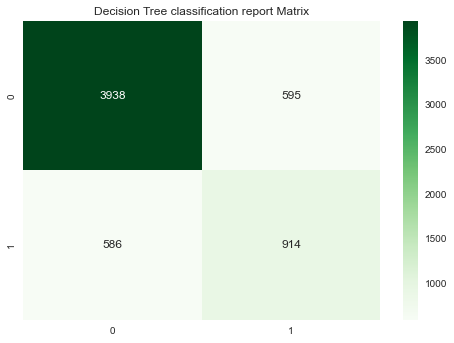

In [381]:
dt=DecisionTreeClassifier()

dt_model=dt.fit(xdt_train, ydt_train)

ydt_pred= dt_model.predict(xdt_test)


print(classification_report(ydt_test, ydt_pred))

sns.heatmap(confusion_matrix(ydt_test, ydt_pred),cmap='Greens', annot=True, fmt='d')
plt.title("Decision Tree classification report Matrix")

# Classification Model 2: Random Forest 

In [384]:
#Perform Test and Train Split
#Splitting the data into test and train
from sklearn.model_selection import train_test_split
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [385]:
#Fit Random Classifier to the data
from sklearn.ensemble import RandomForestClassifier

In [386]:
#Creating Gausian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [387]:
#Train the model using the trainning sets y_predict=clf.predict(x_test)
clf.fit(xrf_train,yrf_train)

RandomForestClassifier()

In [392]:
#Predicting the Category for the testing set
yrf_predict=clf.predict(xrf_test)

In [393]:
#Check the accuracy of the Model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(yrf_test,yrf_predict))

Accuracy: 0.8463451019393337


In [394]:
print(confusion_matrix(yrf_test, yrf_predict))

[[4188  345]
 [ 582  918]]


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

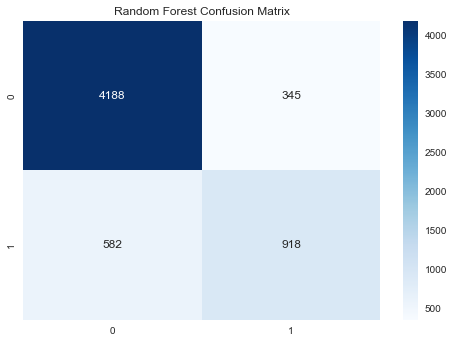

In [396]:
sns.heatmap(confusion_matrix(yrf_test, yrf_predict),cmap='Blues', annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4533
           1       0.73      0.62      0.67      1500

    accuracy                           0.85      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



Text(0.5, 1.0, 'Random Forest classification report Matrix')

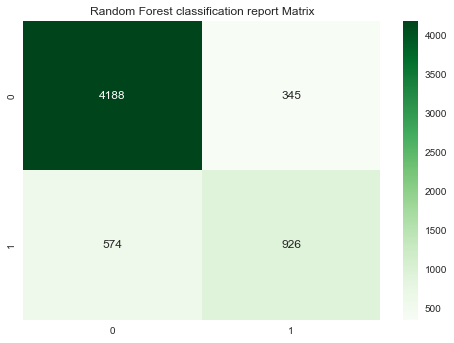

In [397]:
rf=RandomForestClassifier()

rf_model=rf.fit(xrf_train, yrf_train)

yrf_pred= rf_model.predict(xrf_test)


print(classification_report(yrf_test, yrf_pred))

sns.heatmap(confusion_matrix(yrf_test, yrf_pred),cmap='Greens', annot=True, fmt='d')
plt.title("Random Forest classification report Matrix")

param =   {'criterion' : ['gini', 'entropy'],
            'max_depth' : range(1, 20),
            'splitter' : ['best', 'random'],
            'max_features' : ['sqrt', 'log2'],
            'min_samples_split': range(2, 20),
            'random_state' : [0],
            }

In [399]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [400]:
 #Fit the grid search to the data
grid_search.fit(xrf_train, yrf_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, xrf_train,  yrf_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


NameError: name 'evaluate' is not defined

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

# Clustering
This involves unsupervised machine learning techniques which do not require labelled data.

# Clustering Model 1: KMeans Clustering
This is a Machine learning algorithm that varies widely with other algorithms as it does not require any trainning data (George, 2021). This ml algorithm has one major hyper parameter whic is the K adn this determines the number of clusters.

thus there will will be no test and trainning split of the data in this section.
The data used in this section is first scaled using the Standardscaler() function. this will ensure that all data are on the same scale and units. The Sklearn library was sed to optimise the hyperparameter for k means.

Deriving KMeans using the elbow method
Using the Elbow Method to Get K means,The plot looks like an arm, and the elbow on the arm is optimal k.

In [401]:
import matplotlib.pyplot as plt


In [402]:
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [403]:

scaler=StandardScaler()
data = scaler.fit_transform(data)

In [406]:
k_values = list(range(2,20))
inertias=[]

for k in k_values:
    km= KMeans(n_clusters=k)
    km.fit(data)
    inertias.append(km.inertia_)

In [405]:
#Apply Kmeans clustering using sklearn.cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 42)
inertias = []
y_kmeans = kmeans.fit_predict(data)
inertias.append(kmeans.inertia_)


Text(0, 0.5, 'WCSS')

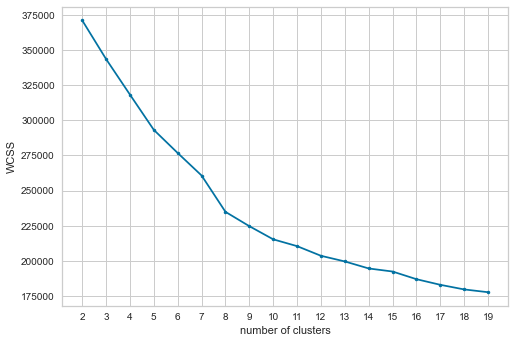

In [407]:
plt.plot(k_values, inertias, marker=".")
plt.xticks(k_values)
plt.xlabel("number of clusters")
plt.ylabel("WCSS")

In [408]:
#Get the Cluster Centres
kmeans.cluster_centers_

array([[ 0.37447699,  0.10499736, -0.03906834,  0.02924624,  0.1260115 ,
        -0.46052521,  0.06315511, -0.68355444,  0.56329142,  0.09240641,
         0.09308726,  0.33378558,  0.0294598 ,  0.35589091],
       [-0.44596137, -0.12504044,  0.04652614, -0.03482909, -0.150066  ,
         0.54843545, -0.07521087,  0.81403901, -0.67081883, -0.11004599,
        -0.1108568 , -0.39750233, -0.03508342, -0.42382738]])

In [411]:
#using the Elbow Method to Get KMeans. 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data=data
def find_best_k():
    sum_of_squared_distances = []
    K=range(1,11)  
    for k in K:
        km=KMeans(n_clusters=k)
        km=km.fit(data)
        sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('Elbow method for optimal k')
    plt.show()  
   

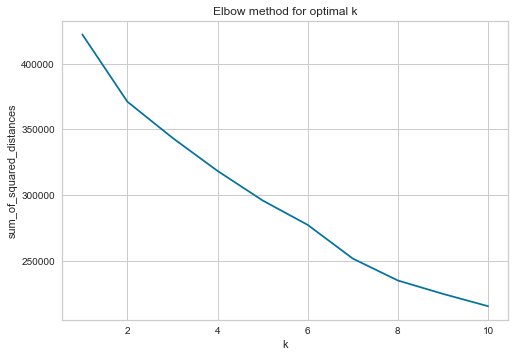

InvalidIndexError: (slice(0, 3, None), 1)

In [412]:
#step 1: find optimal k (number of clusters)
find_best_k()

def run_kmeans(k,data): # k is the optimal number of clusters
    km=KMeans(n_clusters=k) 
    km=km.fit(data)
    centroids = km.cluster_centers_  #get the center of clusters
    #print(centroids)
    return centroids

def plotresults():
    centroids=run_kmeans(3,data)     
    plt.plot(data[0:3,0],data1[0:3,1],'ro',data1[3:7,0],data1[3:7,1],'bo',data[7:12,0],data[7:12,1],'go')
    for i in range(3):
        plt.plot(centroids[i,0],centroids[i,1],'k*')
        plt.text(centroids[i,0],centroids[i,1], "c"+str(i), fontsize=12)
plotresults()

In [ ]:
#Finding Kmeans using the optimal K derived from the elbow method
#Apply Kmeans clustering using sklearn.cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(data1)

In [ ]:
#Get the Cluster Centres
kmeans.cluster_centers_

# Applying Hyperparameter Tuning
three hyperparameters have been identified for tuning the 
Three parameters were used for further optimisation and fine tunning. the aim of using these parameters was to prevent size inefficiencies  and sub-optimal algorithm results. The paremeters were init, tol, and verbose.

# Clustering Model 2: Hierarchal Clustering (Unsupervised Clustering )

In [413]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import networkx as nx
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(100, 0.01)
#dendrogram = generate_dendrogram(G)

In [414]:
import networkx as nx


In [415]:
!pip install community
G = nx.erdos_renyi_graph(100, 0.01)



In [417]:
from community import generate_dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
import networkx as nx
import community
G = nx.erdos_renyi_graph(100, 0.01)
#dendrogram = community.generate_dendrogram(G)
#dendrogram = community.generate_dendrogram(G)

ImportError: cannot import name 'generate_dendrogram' from 'community' (C:\Users\s4113291\Anaconda3\lib\site-packages\community\__init__.py)

In [ ]:
#Performing feature scaling i.e standardisation
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = dendrogram(linkage(data, method="ward"))
plt.axhline(y=30, color="r", linestyle="--")
plt.ylabel("depth")
plt.xlabel("points in cluster")

Text(0.5, 0, 'points in cluster')

The y axis show the distance between points. This ranges from 0-280. The horizontal broken line at the 60 mark further indicates clusters that have a distance corresponding to y value; this can be observed at the 60 mark.Lastly, we can observe that in similarity with the k-means findsings we can observe that the number of points are similar. Other benefits of Hierachal clustering is that it can be applied to strangely shaped clusters more effectively, compared to KMeans algorithm.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_hc=cluster.fit_predict(data)
y_hc

In [ ]:
plt.scatter(data[y_hc -- 0,0], data[y_hc -- 0, 1], s = 60, c = "red", label = "cluster1")

In [ ]:
ac=AgglomerativeClustering(n_clusters=3)
ac.fit(data)

In [183]:
!pip install yellowbrick
from yellowbrick.cluster import intercluster_distance
intercluster_distance(km, data1, random_state=42)


NameError: name 'km' is not defined

In [ ]:
viz = kelbow_visualizer(AgglomerativeClustering(),
                        data,
                        k=(2, 20),
                        show=False)

# Artificial Neural Networks

Artificial Neural Network (ANN)
Keras libraries supported by The Google framework backend named TensorFlow was implemented in this section. Though they are not python libraries, they offer bindings into python alongside the fact that they are low level implementations, which makes it appropriate for this study. The TensorFlow also posses some of the most uptodate techniques in the deep learning space and at the same time it features a high level language interface. Hence it is an apt for the implementation levels to be carried out in this study alongside the use of modular libraries needed to carry out the deeplearning tasks.(Rogel-Salazar, 2020). A total of 100 Epochs were chosen which indicated the number of iterations that the algorithm will run on the trainning data set. this number was arbitratily chosesn, such that the algortim has enough time to learn the parameters and minimise the error. Masters and Luschi 2018 have supported the used of small batch sizes such as a batch size between 2 and 32. however popular batch sizes are 34, 64 or 128. Each epoch contains one or more batches a batch size of 32 (which refer to the number of samples in each epoch was used in this algorithm was chosen for each epoch. lastly the rectified Linear Unit ReLU was used as the application function in this algorithm.

In [59]:
#Importing Libraries
import numpy as np
import pandas as pd

!pip install tensorflow
import tensorflow as tf
#Importing Libraries
import numpy as np
import pandas as pd
!pip install  tensorflow_model_optimization
import tensorflow_model_optimization as tfmot


In [60]:
data=pd.read_csv("N:\CensusDB.csv")

In [61]:
data1 = data.drop ('fnlwgt',axis=1) 

In [62]:
#Removing the rows with "?"
data2=data1.replace('?', np.nan).dropna()
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States,<=50K
6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K


In [65]:
#Encoding Categorical variables
#Transforming Categorical Variables
from sklearn import preprocessing
data=data2
le = preprocessing.LabelEncoder()
data2['workclass'] = le.fit_transform(data2['workclass'])
data2['education'] = le.fit_transform(data2['education'])
data2['marital-status'] = le.fit_transform(data2['marital-status'])
data2['occupation'] = le.fit_transform(data2['occupation'])
data2['relationship'] = le.fit_transform(data2['relationship'])
data2['sex'] = le.fit_transform(data2['sex'])
data2['native-country'] = le.fit_transform(data2['native-country'])



In [67]:
#Transforming the income column (target variable) to "1" if income is greater than 50k, or "0" if income is less than 50k

data2["income"]= data2["income"].apply(lambda x: 0 if x == '<=50K' else 1  )

In [68]:
data2

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,82,2,11,9,6,3,1,0,0,4356,18,38,0
3,54,2,5,4,0,6,4,0,0,3900,40,38,0
4,41,2,15,10,5,9,3,0,0,3900,40,38,0
5,34,2,11,9,0,7,4,0,0,3770,45,38,0
6,38,2,0,6,5,0,4,1,0,3770,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,15,10,4,10,1,1,0,0,40,38,0
32557,27,2,7,12,2,12,5,0,0,0,38,38,0
32558,40,2,11,9,2,6,0,1,0,0,40,38,1
32559,58,2,11,9,6,0,4,0,0,0,40,38,0


In [69]:
data2
def outL_func(q25,q75):
    return (q75 + 1.5*(q75-q25))

def outR_func(q25,q75):
    return (q25 - 1.5*(q75-q25))

def out_rem(x,outL,outR):
    if x>outR:
        return outR
    
    elif x<outL:
        return outL
    else :
        return x

In [70]:
#creating Predictors x and y
x= data2.drop("income",1) #Independent Variables
y= data2.income #Dependent Variable

C:\Users\s4113291\AppData\Local\Temp\ipykernel_29940\4206562666.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x= data2.drop("income",1) #Independent Variables


In [71]:
#Splitting the data into test and train

from sklearn.model_selection import train_test_split
xan_train, xan_test, yan_train, yan_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [72]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
xan_train=sc.fit_transform(xan_train)
xan_test=sc.transform(xan_test)

In [73]:
#Initializing ANN
ann= tf.keras.models.Sequential()

In [74]:
#Creating Hidden Layers
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [75]:
#Adding Second Hidden Layer 
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [76]:
#Create Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [77]:
#Compiling created artificial Neural Network
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [78]:
#fitting Artificial Neural Network
data2
history=ann.fit(xan_train,yan_train,validation_data=(xan_test,yan_test),batch_size=32,epochs=100)

Epoch 1/100
755/755 [==============================] - 1s 1ms/step - loss: 0.4566 - accuracy: 0.7667 - val_loss: 0.3983 - val_accuracy: 0.8099
Epoch 2/100
755/755 [==============================] - 1s 1ms/step - loss: 0.3644 - accuracy: 0.8315 - val_loss: 0.3612 - val_accuracy: 0.8283
Epoch 3/100
755/755 [==============================] - 1s 1ms/step - loss: 0.3462 - accuracy: 0.8378 - val_loss: 0.3549 - val_accuracy: 0.8288
Epoch 4/100
755/755 [==============================] - 1s 1ms/step - loss: 0.3415 - accuracy: 0.8387 - val_loss: 0.3532 - val_accuracy: 0.8316
Epoch 5/100
755/755 [==============================] - 1s 1ms/step - loss: 0.3394 - accuracy: 0.8402 - val_loss: 0.3515 - val_accuracy: 0.8324
Epoch 6/100
755/755 [==============================] - 1s 1ms/step - loss: 0.3376 - accuracy: 0.8402 - val_loss: 0.3506 - val_accuracy: 0.8323
Epoch 7/100
755/755 [==============================] - 1s 1ms/step - loss: 0.3366 - accuracy: 0.8404 - val_loss: 0.3505 - val_accuracy: 0.8346

In [79]:
#Predicitng Results for Single Point Observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 64ms/step
[[False]]


C:\Users\s4113291\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [80]:
#Calculating Testing Accuracy
loss, acc = ann.evaluate(xan_test,yan_test)
print("Test Accuracy: %f' % (acc*100)")

189/189 [==============================] - 0s 916us/step - loss: 0.3402 - accuracy: 0.8417
Test Accuracy: %f' % (acc*100)


The loss (cost) function is used to evaluate how well the Artificial Neural Network algorithm models the trainning data provided as demonstrated by Rogel-Salazar, 2020. Since the loss (0.3512) function is lesser than the accuracy (0.8337) function, we can say that the predictions are good. however if the loss function was higher than the accuracy, we ill say that the chosen algorithm did not perform well.

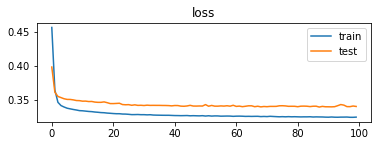

In [81]:
#Plot loss for both trainning and testing sets on the same graph
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title("loss")
pyplot.plot(history.history["loss"], label="train")
pyplot.plot(history.history["val_loss"], label="test")
pyplot.legend()

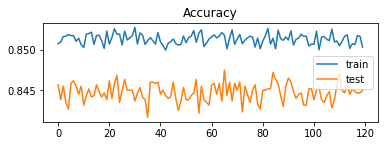

In [100]:
#plot accuracy for both trainning and testing sets on the same graphs
pyplot.subplot(211)
pyplot.title("Accuracy")
pyplot.plot(history.history["accuracy"], label="train")
pyplot.plot(history.history["val_accuracy"], label="test")
pyplot.legend()
pyplot.show()

Increasing the Batchsize and Epochs of the ANN Algorithm
The batch size was increased from 32 to 40, which implies the number of samples in each batch was 40. The epochs were increase from 100 to 120. Thus implying the 120 iterations were run by the algorithm on the data set. It was observed that upon increasing the epochs and the batch size, the accuracy increase by approaximately 0.05% while the loss decreased by 0.05%. The accuracy curces for both test and trainning set also presented as very noisy thus requiring the application of smoothing techniques while the linearity was also reduced.

In [101]:
#fitting Artificial Neural Network
history=ann.fit(xan_train,yan_train,validation_data=(xan_test,yan_test),batch_size=40,epochs=120)

Epoch 1/120
604/604 [==============================] - 1s 1ms/step - loss: 0.3139 - accuracy: 0.8511 - val_loss: 0.3335 - val_accuracy: 0.8429
Epoch 2/120
604/604 [==============================] - 1s 2ms/step - loss: 0.3138 - accuracy: 0.8509 - val_loss: 0.3307 - val_accuracy: 0.8434
Epoch 3/120
604/604 [==============================] - 1s 2ms/step - loss: 0.3140 - accuracy: 0.8523 - val_loss: 0.3295 - val_accuracy: 0.8454
Epoch 4/120
604/604 [==============================] - 1s 2ms/step - loss: 0.3138 - accuracy: 0.8506 - val_loss: 0.3291 - val_accuracy: 0.8457
Epoch 5/120
604/604 [==============================] - 1s 2ms/step - loss: 0.3138 - accuracy: 0.8520 - val_loss: 0.3292 - val_accuracy: 0.8457
Epoch 6/120
604/604 [==============================] - 1s 2ms/step - loss: 0.3140 - accuracy: 0.8513 - val_loss: 0.3288 - val_accuracy: 0.8463
Epoch 7/120
604/604 [==============================] - 1s 1ms/step - loss: 0.3138 - accuracy: 0.8520 - val_loss: 0.3298 - val_accuracy: 0.8455

In [102]:
#Predicitng Results for Single Point Observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 15ms/step
[[ True]]


C:\Users\s4113291\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [107]:
#Calculating Testing Accuracy
loss, acc = ann.evaluate(xan_test,yan_test)
print("Test Accuracy: %f' % (acc*100)")

189/189 [==============================] - 0s 994us/step - loss: 0.3299 - accuracy: 0.8452
Test Accuracy: %f' % (acc*100)


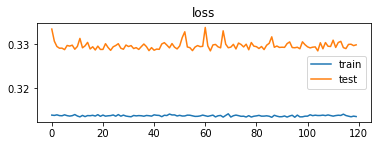

In [108]:
#Plot loss for both trainning and testing sets on the same graph
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title("loss")
pyplot.plot(history.history["loss"], label="train")
pyplot.plot(history.history["val_loss"], label="test")
pyplot.legend()

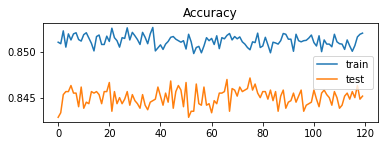

In [109]:
#plot accuracy for both trainning and testing sets on the same graphs
pyplot.subplot(211)
pyplot.title("Accuracy")
pyplot.plot(history.history["accuracy"], label="train")
pyplot.plot(history.history["val_accuracy"], label="test")
pyplot.legend()
pyplot.show()


In [106]:
#Predicitng Results for Single Point Observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 15ms/step
[[ True]]


C:\Users\s4113291\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


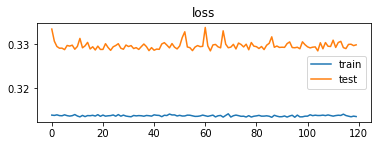

In [110]:
#Plot loss for both trainning and testing sets on the same graph
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title("loss")
pyplot.plot(history.history["loss"], label="train")
pyplot.plot(history.history["val_loss"], label="test")
pyplot.legend()

# Optimisation of the ANN
Hyper parameter tunning was used to improve the accuracy of the predictions. The MLP classifier from from Sk learn.neural network was used to for hyper parameter tunning. The first step involved determinng parameters that will be applied inorder to minimize the error in the trainning data. Minimising the error will be evident in a lower loss function, and this will imply further maximizing our predictions to match the trainning dataset.(Chollet, 2021). Hyperparameter tuning for Neural networks refers to the number of hyper parameters which include hidden neurons.

!pip install  tensorflow_model_optimization
import tensorflow as tf
import tensorflow_model_optimization as tfmot
!pip install  tensorflow_model_optimization

In [143]:
import tensorflow as tf
import tensorflow_model_optimization as tfmot



In [144]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer



In [145]:
import keras
from keras.models import Sequential, load_model
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

# For VGG16 loading to sequential model  
model = Sequential(VGG16().layers)
# For VGG19 loading to sequential model  
model = Sequential(VGG19().layers)

In [146]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout
from keras.layers import BatchNormalization

# Hyperparameters tuned include
Batch Size: Referring to number of samples in each size
Epochs: The number of Iterations that the ANN algorithm will execute
Hidden Layers: Referrring to number of Neural Networks

# Conclusion
Machine learning models have proven invaluable in the prediction of annual income levels using census data. After employing both supervised and unsupervised machine learning models,such as logistic regression, decison trees and random forest.learning models such as logistic regression. Our models was successfully trained with an accuracy of 84/17%. Optimising this accuaracy ffurther,through hyper parenter tunning, the accuracy was improved to 84.52%.



# References
Burkov, A. (2019). The hundred-page machine learning book (Vol. 1, p. 32). Quebec City, QC, Canada: Andriy Burkov.
Chollet, F., 2021. Deep learning with Python. Simon and Schuster.Page 156.
Conway, Drew, and John White. Machine learning for hackers. " O'Reilly Media, Inc.", 2012.
Flach, P., 2012. Machine learning: the art and science of algorithms that make sense of data. Cambridge university press.
https://pythonguides.com/scikit-learn-hyperparameter-tuning/
https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
Michalski, R.S., Carbonell, J.G. and Mitchell, T.M. eds., 2013. Machine learning: An artificial intelligence approach. Springer Science & Business Media.
Perrotta, P., 2020. Programming Machine Learning: From Coding to Deep Learning. Programming Machine Learning, pp.1-300.
Raschka, S., 2015. Python machine learning. Packt publishing ltd.
Rogel-Salazar, J., 2020. Advanced Data Science and Analytics with Python. CRC Press. page 222-235
Rogers, S. and Girolami, M., 2016. A first course in machine learning. Chapman and Hall/CRC.
Trask, A.W., 2019. Deep learning. Manning publicatyions. New york.
George N.,(2021). Practical Data Science with Python. Packt publishing limited. United kingdom. page 345.
Masters, D. and Luschi, C., 2018. Revisiting small batch training for deep neural networks. arXiv preprint arXiv:1804.07612.
Unpingco, J., 2016. Python for probability, statistics, and machine learning (Vol. 1). Springer International Publishing.